## 现状
对重复滤波已经有一定的把握和了解了，继续停留在一维角度似乎难以有明显的突破。为此，加入时间维度，开始考虑新维度下重复滤波的检测情况。此时，检测效果对应条纹图案，可以直接的评估，而不会出现模棱两可的弱信号情况。

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd


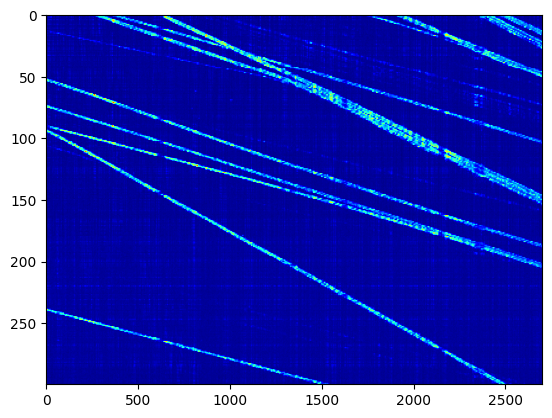

In [2]:
dp = "D:/code/fiber/data/npy/1.npy"
arr = np.load(dp)[:, 100:2800]

plt.imshow(arr, aspect='auto', cmap='jet')
plt.show()

## 重复滤波结果可视化
接下来，将重复条纹位置结果可视化到上面的图上，观察需要纠正的程度。

In [3]:
from rfa import GetPP, StripeManager, EvaluateIntervals

In [4]:
help(GetPP)

Help on class GetPP in module rfa.getPP:

class GetPP(builtins.object)
 |  GetPP(dataframe_p)
 |  
 |  use function run, generate peak pillars.
 |  The only postprocessing is in the tangent part.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dataframe_p)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  run(self, sig, i, vis=False, save_stripe_raw=True)
 |      执行整个流程
 |      :param sig: 输入信号，一维向量
 |      :param i: 编号（第几个信号）
 |      :param vis: visualize?
 |      :param save_stripe_raw: save raw stripes, dataframe
 |      :return: None
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [5]:
help(StripeManager)

Help on class StripeManager in module rfa.manageStripe:

class StripeManager(builtins.object)
 |  StripeManager(i, sig, csv_dp, k=4)
 |  
 |  条纹聚类，针对单一信号，给出脉冲区间
 |  
 |  Methods defined here:
 |  
 |  __init__(self, i, sig, csv_dp, k=4)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  pipeline1(self, y, vis=False)
 |      得到归类后的条纹，也就是最终形式的条纹
 |      针对的是单独的信号
 |      在_get_pulse_interval中，滤除了区间长度小于1的预测
 |      :param y: label
 |      :param vis: 是否保存可视化图片
 |      :return:
 |  
 |  pipeline2(self, vis=False)
 |      得到归类后的条纹，也就是最终形式的条纹
 |      针对的是单独的信号
 |      在_get_pulse_interval中，滤除了区间长度小于1的预测
 |      :param y: label
 |      :param vis: 是否保存可视化图片
 |      :return:
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [6]:
arr.shape

(300, 2700)

In [7]:
csv_dp = os.path.abspath("dataframe/raw")
if not os.path.exists(csv_dp):
    os.makedirs(csv_dp)
m = arr.shape[0]
k=4
intervals = []

gp = GetPP(dataframe_p=csv_dp)


for i in tqdm(range(m)):
    sig = arr[i]
    gp.run(i=i, sig=sig)
    sm = StripeManager(i, sig, csv_dp, k=k)
    sm.pipeline2()
    intervals.append(sm.pulseInterval)
    

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [05:27<00:00,  1.09s/it]


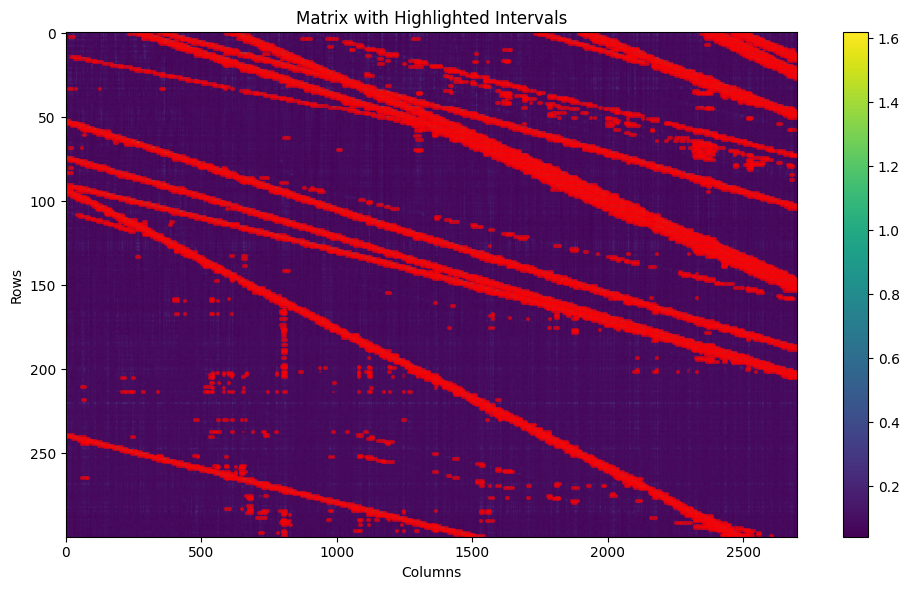

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

# 可视化矩阵
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(arr, cmap='viridis', aspect='auto', origin='upper')
plt.colorbar(im, ax=ax)  # 添加颜色条

# 创建矩形补丁集合
rects = []
for i, interval in enumerate(intervals):  # 遍历每行
    for (start, end) in interval:                # 遍历行内的每个区间
        # 创建矩形：X起始位置=start, Y起始位置=i-0.3, 宽度=end-start, 高度=0.6
        rect = patches.Rectangle(
            (start - 0.5, i - 0.3),  # 矩形左下角坐标
            end - start,              # 宽度
            0.6,                      # 高度
            linewidth=2,
            edgecolor='red',
            facecolor='none',         # 透明填充
            alpha=0.7
        )
        rects.append(rect)

# 将矩形添加到坐标轴
pc = PatchCollection(rects, match_original=True)
ax.add_collection(pc)

# 设置坐标轴标签
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Matrix with Highlighted Intervals')

# 调整布局并显示
plt.tight_layout()
plt.show()

In [2]:
fp = "D:/code/fiber/DetStageI/npy/knee/50.npy"
a = np.load(fp)

In [3]:
import matplotlib.pyplot as plt

In [4]:
a.shape

(440, 2)

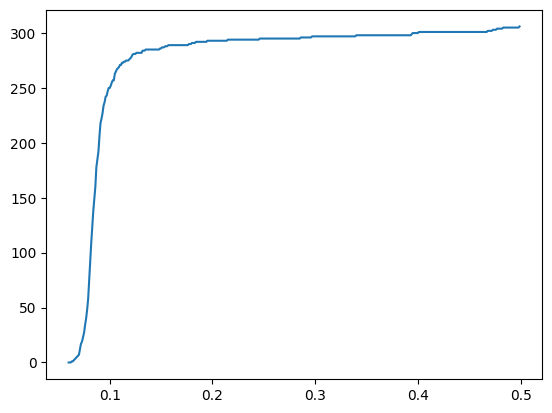

In [5]:
plt.plot(a[:, 0], a[:, 1])


In [6]:
a[:, 1]

array([  0.,   0.,   0.,   1.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
        12.,  17.,  19.,  23.,  27.,  34.,  40.,  48.,  58.,  75.,  91.,
       109., 123., 138., 149., 160., 178., 185., 192., 206., 218., 222.,
       227., 234., 237., 242., 243., 247., 250., 250., 252., 255., 257.,
       257., 263., 265., 267., 268., 269., 271., 271., 273., 273., 274.,
       274., 275., 275., 275., 276., 277., 278., 280., 281., 281., 281.,
       282., 282., 282., 282., 282., 282., 284., 284., 284., 285., 285.,
       285., 285., 285., 285., 285., 285., 285., 285., 285., 285., 285.,
       285., 286., 286., 287., 287., 287., 288., 288., 288., 289., 289.,
       289., 289., 289., 289., 289., 289., 289., 289., 289., 289., 289.,
       289., 289., 289., 289., 289., 289., 289., 290., 290., 290., 291.,
       291., 291., 291., 292., 292., 292., 292., 292., 292., 292., 292.,
       292., 292., 292., 293., 293., 293., 293., 293., 293., 293., 293.,
       293., 293., 293., 293., 293., 293., 293., 29

In [7]:
a[:, 0]

array([0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068,
       0.069, 0.07 , 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077,
       0.078, 0.079, 0.08 , 0.081, 0.082, 0.083, 0.084, 0.085, 0.086,
       0.087, 0.088, 0.089, 0.09 , 0.091, 0.092, 0.093, 0.094, 0.095,
       0.096, 0.097, 0.098, 0.099, 0.1  , 0.101, 0.102, 0.103, 0.104,
       0.105, 0.106, 0.107, 0.108, 0.109, 0.11 , 0.111, 0.112, 0.113,
       0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12 , 0.121, 0.122,
       0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13 , 0.131,
       0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14 ,
       0.141, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148, 0.149,
       0.15 , 0.151, 0.152, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158,
       0.159, 0.16 , 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167,
       0.168, 0.169, 0.17 , 0.171, 0.172, 0.173, 0.174, 0.175, 0.176,
       0.177, 0.178, 0.179, 0.18 , 0.181, 0.182, 0.183, 0.184, 0.185,
       0.186, 0.187,

In [54]:
sp = "dataframe/raw/50.csv"
df = pd.read_csv(sp)
h = df.groupby("id")["h"].mean().to_numpy()

In [57]:
# h = df.h[(df.h >= 0.06) & (df.h<0.5)].to_numpy()
sorted_h = np.sort(h)
H = np.arange(0.06, 0.5, 0.001)  # 确保包含h.max()
x = np.searchsorted(sorted_h, H, side='left')  
x

array([  0,   0,   0,   1,   1,   2,   3,   4,   5,   6,   7,  12,  17,
        19,  23,  27,  34,  40,  48,  58,  75,  91, 109, 123, 138, 149,
       160, 178, 185, 192, 206, 218, 222, 227, 234, 237, 242, 243, 247,
       250, 250, 252, 255, 257, 257, 263, 265, 267, 268, 269, 271, 271,
       273, 273, 274, 274, 275, 275, 275, 276, 277, 278, 280, 281, 281,
       281, 282, 282, 282, 282, 282, 282, 284, 284, 284, 285, 285, 285,
       285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 286, 286,
       287, 287, 287, 288, 288, 288, 289, 289, 289, 289, 289, 289, 289,
       289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289,
       290, 290, 290, 291, 291, 291, 291, 292, 292, 292, 292, 292, 292,
       292, 292, 292, 292, 292, 293, 293, 293, 293, 293, 293, 293, 293,
       293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 293, 294,
       294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294,
       294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 294, 29

In [61]:
np.c_[H, x]

array([[6.00e-02, 0.00e+00],
       [6.10e-02, 0.00e+00],
       [6.20e-02, 0.00e+00],
       [6.30e-02, 1.00e+00],
       [6.40e-02, 1.00e+00],
       [6.50e-02, 2.00e+00],
       [6.60e-02, 3.00e+00],
       [6.70e-02, 4.00e+00],
       [6.80e-02, 5.00e+00],
       [6.90e-02, 6.00e+00],
       [7.00e-02, 7.00e+00],
       [7.10e-02, 1.20e+01],
       [7.20e-02, 1.70e+01],
       [7.30e-02, 1.90e+01],
       [7.40e-02, 2.30e+01],
       [7.50e-02, 2.70e+01],
       [7.60e-02, 3.40e+01],
       [7.70e-02, 4.00e+01],
       [7.80e-02, 4.80e+01],
       [7.90e-02, 5.80e+01],
       [8.00e-02, 7.50e+01],
       [8.10e-02, 9.10e+01],
       [8.20e-02, 1.09e+02],
       [8.30e-02, 1.23e+02],
       [8.40e-02, 1.38e+02],
       [8.50e-02, 1.49e+02],
       [8.60e-02, 1.60e+02],
       [8.70e-02, 1.78e+02],
       [8.80e-02, 1.85e+02],
       [8.90e-02, 1.92e+02],
       [9.00e-02, 2.06e+02],
       [9.10e-02, 2.18e+02],
       [9.20e-02, 2.22e+02],
       [9.30e-02, 2.27e+02],
       [9.40e-